# The k-armed bandit from the book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.3 The 10-armed Testbed

Initially we want to pick k random numbers from a normal distrubution with mean, mu = 0, and sigma = 1. Note that each time we pick we will pick a new set of k random numbers. These values will be the action values, q*(a) shown in figure 2.1

In [12]:
def bandit_001(k=10, mu=0, sigma=1):
    '''
    A way to get the initial distributions for the ten-armed bandit
    '''
    # Default values are k = 10, mu = 0; sigma = 1
    action_values = np.random.normal(mu, sigma, k)
    # An empty array to put the ten initial distributions in
    result = []
    for _ in range(k):
        # Use the caluclated value of q*(a)for each of the ten bandits as the average for a new distribution
        # Use 500 sample points for each normal distribution
        val = np.random.normal(action_values[_], sigma, 500)
        result.append(val)
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    
    bp = ax.violinplot(result, showextrema=False, showmeans=True)
    ax.set_title('The 10-armed Testbed - optimal run = ' + str(np.argmax(action_values)+1))
    ax.set_xlabel('Action')
    ax.set_ylabel('Reward Distribution')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.show()
    return(action_values)

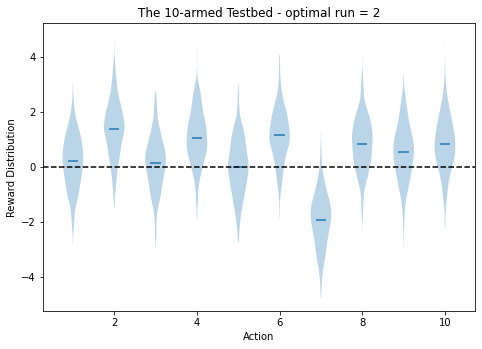

In [13]:
av = bandit_001(10)

The bandit_001 function returns the list of action values for the k-armed bandit. That is the values of q*(a) for each distribution.

The next step is to run an experiment over 1000 time steps (or pulls of the arm) utilising firstly a greedy approach, then moving onto an epsilon-greedy approach. Note this cycle of a thousand counts as one run

In [57]:
class Agent(object):
    '''
    Chooses actions randomly and updates estimates (using sample average)
    '''

    def __init__(self, k, initial_value=0):
        self.k = k
        self.initial_value = initial_value
        self.value_estimates = initial_value*np.ones(self.k)
        self.action_attempts = np.zeros(self.k)
        self.t = 0
        self.last_action = None
        print(self.initial_value)
        print(self.value_estimates)
        print(self.action_attempts)
        print(self.t)
        print(self.last_action)

In [58]:
test1 = Agent(10)


0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
None


In [40]:
def run_001(action_values, nsteps=1000):
    '''
    Running a greedy experiment for 1000 time steps
    In this example we take the action values from the initial bandit experiment, (bandit_001)
    next the distribution with the highest/largest mu is picked. 
    Finally 1000 samples are taken from this distribution. The average reward is worked out at each step
    and is plotted and the experimental action value recalculated at each step
    '''
    experiment_action_values = action_values
    greedy_dist=np.argmax(experiment_action_values) # Find the distribution with the highest/largest mu
    print(action_values)
    greedy_mu=experiment_action_values[greedy_dist] # Pull the value of mu from it
    sum_of_rewards=0
    running_average=0
    sigma = 1
    # Make a new sample distribution with that mu and nsteps data points in it
    sample_distribution=np.random.normal(greedy_mu,sigma,nsteps) 
    for _ in range(nsteps):
        sum_of_rewards=sum_of_rewards + sample_distribution[_]
        running_average=sample_average(sum_of_rewards, _+1)
        
    print(f'After running for {nsteps} steps, the sample average for distribution {greedy_dist} is {round(running_average,2)}, while the actual average is {round(greedy_mu,2)}')

def sample_average(sum_rewards, times_taken):
    updated_average = sum_rewards/times_taken
    return updated_average
    
    

In [41]:
run_001(av)
print(av)

[ 0.17840626  1.35839954  0.21040642  1.04299234  0.0344865   1.12603402
 -2.02469212  0.7823951   0.49123274  0.84902269]
After running for 1000 steps, the sample average for distribution 1 is 1.36, while the actual average is 1.36
[ 0.17840626  1.35839954  0.21040642  1.04299234  0.0344865   1.12603402
 -2.02469212  0.7823951   0.49123274  0.84902269]


Before I get to the experiment though I want to try out a few basic options for the bandit class.
Here I have defined a Bandit001 which will be defined based on one normal distribution. 
It takes in the number of steps (or pulls), an initial estimate for the rolling average (I think this is not actually needed as an argument though, I could just put it in the __init__ block. It also takes in a value for the target mu for the normal distribution. (note target mu defaults to 3.5 if no number is given)

Firstly I set an array for the trial results and for the computed average for each step and set them to be nsteps in size and filled with zeros

Next I define a function called est. This is a function that will use the calculation for efficiently estimating the average after n steps sampling from a normal distribution outlined in equation 2.3 in the book.
The function returns the new estimate, the list of the random numbers picked from the normal distribution and the average calculated at each step.

Finally I plot the data just to have a look at it and make sure it seems sensible. In this case the blue circles are the randomly chosen values from the normal distribution with mu=target_mu, and the orange line is the average as calculated at each time step.

In [6]:
class Bandit001(object):
    def __init__(self, steps, old_est=0, targ_mu=3.5):
        self.steps = steps
        self.old_est = old_est
        self.targ_mu = targ_mu
        self.new_est = 0
        self.trials=np.zeros(steps)
        self.avs=np.zeros(steps)
        
    def est(self):
        """A function to estimate the average using the calculations from 2.3"""
        for n in range(self.steps):
            target = np.random.normal(self.targ_mu)
            self.new_est = self.old_est + ((target-self.old_est)/(n+1))
            self.old_est=self.new_est
            self.trials[n] += target
            self.avs[n] += self.new_est
        new_est = self.new_est
        return self.new_est, self.trials, self.avs
    
    def plotty(self):
        """A function to plot the result of the average estimation"""
        x=list(range(self.steps))
        fig, ax = plt.subplots()
        ax.plot(x, self.trials, '.', label='Trial Values')
        ax.plot(x, self.avs,label='Estimated Average')
        plt.axhline(y=self.targ_mu, color='k', linestyle='--')
        plt.title('Sampling and getting running averages')
        plt.xlabel('Number of samples')
        plt.ylabel('Score')
        plt.legend(loc="lower right")
        plt.show()
        

After 100 runs, the estimated average is 4.3, while the actual average is 4.3


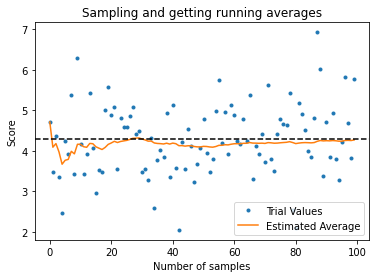

In [7]:
targ_mu=4.3
bandit = Bandit001(100, targ_mu=targ_mu)
est_av, trials, avs = bandit.est()
print(f'After {len(trials)} runs, the estimated average is {round(est_av,1)}, while the actual average is {round(targ_mu,1)}')
bandit.plotty()

Now instead of running this for just one target value, I want to run it for a range of target q*(a) values, specifically the ones I calculated/determined earlier in the page. Lets call this Bandit002

In [8]:
class Bandit002(object):
    def __init__(self, steps, action_values):
        self.steps=steps
        self.action_values=action_values
        self.update_est=action_values #This is where the updates of the action values go
        self.old_estimate=np.zeros(len(action_values))
        self.pulls = np.zeros(len(action_values)) #Count how many pulls there have been
        
        
    def pull(self):
        """Pull the lever for however many steps are needed"""
        for _ in range(self.steps):
            self.optimal_pos=np.argmax(self.action_values) #Position of the highest action value
            self.pulls[self.optimal_pos] += 1 #Increment the counting list
            print(self.pulls)
            print(_, self.update_est[self.optimal_pos])
            #target=np.random.normal(self.update_est[self.optimal_pos])
            #self.update_est[self.optimal_pos] = self.old_estimate[self.optimal_pos] + \
            #self.pulls[self.optimal_pos]*(target-self.old_estimate[self.optimal_pos])
            
        #print(self.update_est)
        print([round(elem, 2) for elem in self.update_est])
        #print(self.pulls)
        #print(self.optimal_pos)
    
        
    def average(self):
        target=self.update_est[self.optimal_pos]
        old_est=self.old_estimate[self.optimal_pos]
        n=self.pulls[self.optimal_pos]
        print(target,old_est,n)

In [9]:
action_values = np.random.normal(0, 1, 10)
b2=Bandit002(10,action_values)

print([round(elem,2) for elem in action_values])
b2.pull()
b2.average()

[2.1, -0.07, -0.03, 0.16, -0.12, 0.47, -1.3, -0.35, -1.36, -1.17]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 2.095741922137221
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 2.095741922137221
[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 2.095741922137221
[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 2.095741922137221
[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 2.095741922137221
[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 2.095741922137221
[7. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 2.095741922137221
[8. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7 2.095741922137221
[9. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 2.095741922137221
[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
9 2.095741922137221
[2.1, -0.07, -0.03, 0.16, -0.12, 0.47, -1.3, -0.35, -1.36, -1.17]
2.095741922137221 0.0 10.0
